In [1]:
import numpy as np
import healpy as hp

In [2]:
!ls

GBmap_ns32.npz            __pycache__               map_GB_npHLV_ns_4.npz
Galinmap_ns32.npz         config.py                 map_GB_npHL_ns_8.npz
IMAPS_class.py            const_ph_tests            map_PC_16_in_ns_2.npz
I_runner.py               gal_inmap.py              map_PC_16_in_ns_4.npz
Imap_GB_HLV_ns_4.npz      hiell_tests               out.pdf
Imap_GB_HL_ns_4.npz       hp_hc_in_ns16.npz         quat_rotation.py
Imap_GB_HL_ns_8.npz       hp_hc_in_ns16_GB.npz      rd_ph_tests
LISAMAPS_class.py         hp_hc_in_ns16_GB_np.npz   readligo.py
OverlapFunctsSrc.py       in_equals_out_tests       unpack.ipynb
PCMAPS_class.py           libsearch                 unpack_point_source.ipynb
PC_runner.py              map_GBHLV_ns_4.npz
Untitled.ipynb            map_GBHL_ns_8.npz


In [17]:
file = np.load('hp_hc_in_ns16_GB_np.npz')
hp_in = file['hp_in']
hc_in = file['hc_in']

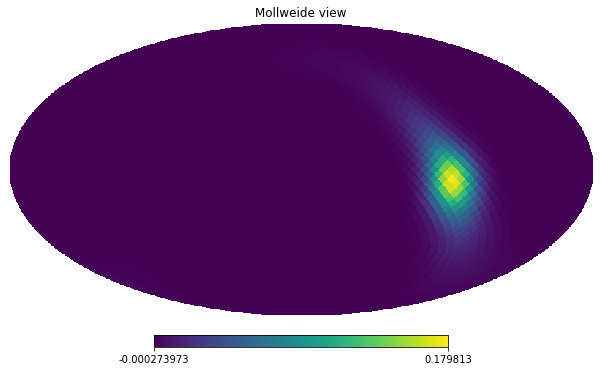

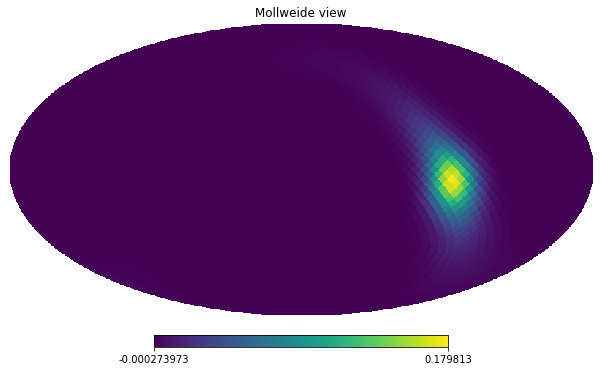

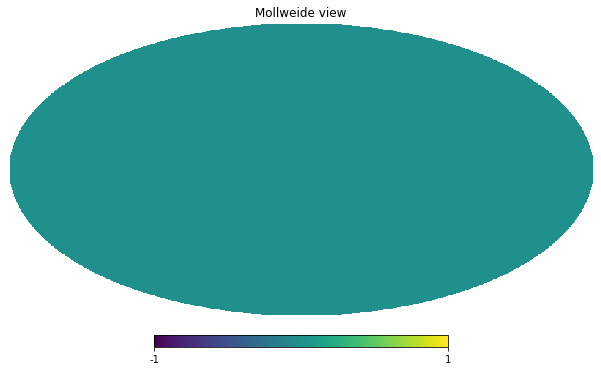

In [18]:
fwhm = 20.*np.pi/180.
nside_in = hp.npix2nside(len(hp_in))
alm = hp.map2alm(hp_in.real, lmax = nside_in*4)
bl = hp.gauss_beam(fwhm, lmax=nside_in*4)
alm = hp.almxfl(alm, bl)
s = hp.alm2map(alm, nside=16, verbose = False)

hp.mollview(s)

ph1 = np.pi*2*np.random.rand(len(s))
ph2 = np.pi*2*np.random.rand(len(s))

hp_in = s#*np.exp(1.j*ph1)
hc_in = s#*np.exp(1.j*ph2)

hp.mollview(hp_in.real)
hp.mollview(hp_in.imag)

np.savez('hp_hc_in_ns16_GB_np_smooth.npz', hp_in = hp_in, hc_in = hc_in)